
# The Battle of the Neighborhoods - Week 2
## Part 1 Download and Explore New York city geographical coordinates dataset

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

Luckily, this dataset exists for free on the web. Link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572

First, let's download all the dependencies that we will need.


In [1]:
print('hello testing')

hello testing


In [5]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from PIL import Image

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot') # optional: for ggplot-like style

print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# install wordcloud
#!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

!conda install -c anaconda beautifulsoup4  --yes
from bs4 import BeautifulSoup # package for parsing HTML and XML documents

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import csv # implements classes to read and write tabular data in CSV form

print('Libraries imported.')

Matplotlib version:  3.1.1
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    certifi-2019.11.28         |           py36_0         156 KB  anaconda
    beautifulsoup4-4.8.2       |           py36_0         161 KB  anaconda
    soupsieve-1.9.5            |           py36_0          61 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.4 MB

The following NEW packages will be INSTALLED:

    soupsieve

The json file is downloaded and it is placed on the server. So run a wget command and access the data.

In [6]:
!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
print('Data downloaded!')

Data downloaded!


### Load and explore the data. 

In [7]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

All the relevant data is in the features key, which is basically a list of the neighborhoods. So, define a new variable that includes this data.

In [8]:
neighborhoods_data = newyork_data['features']

Take a look at the first item in this list.

In [9]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}


### Tranform the data into a pandas dataframe

The next task is essentially transforming this data of nested Python dictionaries into a pandas dataframe. Start by creating an empty dataframe.


In [10]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [11]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then loop through the data and fill the dataframe one row at a time.

In [12]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [13]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Let's make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [14]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [15]:
neighborhoods.to_csv('BON1_NYC_GEO.csv',index=False)

### Use geopy library to get the latitude and longitude values of New York City.¶

In [16]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.



### Create a map of New York with neighborhoods superimposed on top.

Folium is a great visualization library. We can zoom into the below map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.


In [17]:
# create map of Toronto using latitude and longitude values
map_NewYork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)  
    
map_NewYork


## Part 2 Web scrapping of Population and Demographics data of New York city from Wikipedia
<b>A : POPULATION DATA</b>

Web scrapping of Population data from wikipedia page - https://en.wikipedia.org/wiki/New_York_City<br>
<b>Download all the dependencies that is needed.</b>


### Web scrapping of Population data from wikipedia page using BeautifulSoup.

Beautiful Soup is a Python package for parsing HTML and XML documents (including having malformed markup, i.e. non-closed tags, so named after tag soup). It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.


In [18]:
website_url = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(website_url)
table = soup.find('table',{'class':'wikitable sortable'})
#print(soup.prettify())

headers = [header.text for header in table.find_all('th')]

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
    td = row.find_all('td')
    row = [row.text for row in td]
    row=[t.replace('\n','') for t in row]
        
    rows.append(row)

with open('BON2_POPULATION1.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    writer.writerows(row for row in rows if row)

<b>Load data from CSV</b>

In [19]:
Pop_data=pd.read_csv('BON2_POPULATION1.csv')
#Pop_data.drop(Pop_data.columns[[7,8,9,10,11]], axis=1,inplace=True)
print('Data downloaded!')

Data downloaded!


<b>Remove whitespaces and rename columns</b>

In [20]:
Pop_data.columns = Pop_data.columns.str.replace(' ', '')
Pop_data.columns = Pop_data.columns.str.replace('\'','')
Pop_data.rename(columns={'Borough':'persons_sq_mi','County':'persons_sq_km'}, inplace=True)
Pop_data

,NewYorkCitysfiveboroughsvte\n,Jurisdiction\n,Population\n,GrossDomesticProduct\n,Landarea\n,Density\n,persons_sq_mi,persons_sq_km,Estimate(2018)[12],billions(US$)[13],percapita(US$),squaremiles,squarekm,persons/sq.mi,persons/km2\n
0,The Bronx,Bronx,"1,432,132",42.695,"29,200",42.10,109.04,"34,653","13,231",NaN,NaN,NaN,NaN,NaN,NaN
1,Brooklyn,Kings,"2,582,830",91.559,"34,600",70.82,183.42,"37,137","14,649",NaN,NaN,NaN,NaN,NaN,NaN
2,Manhattan,New York,"1,628,701",600.244,"360,600",22.83,59.13,"72,033","27,826",NaN,NaN,NaN,NaN,NaN,NaN
3,Queens,Queens,"2,278,906",93.310,"39,600",108.53,281.09,"21,460","8,354",NaN,NaN,NaN,NaN,NaN,NaN
4,Staten Island,Richmond,"476,179",14.514,"30,300",58.37,151.18,"8,112","3,132",NaN,NaN,NaN,NaN,NaN,NaN
5,City of New York,"8,398,748",842.343,"97,700",302.64,783.83,"28,188","10,947",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,State of New York,"19,745,289","1,701.399","85,700","47,214","122,284",416.4,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Sources:[14] and see individual borough articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
Pop_data.drop(Pop_data.columns[[3,4,9,10,11,12,13,14]], axis=1,inplace=True)
Pop_data

,NewYorkCitysfiveboroughsvte\n,Jurisdiction\n,Population\n,Density\n,persons_sq_mi,persons_sq_km,Estimate(2018)[12]
0,The Bronx,Bronx,"1,432,132",42.10,109.04,"34,653","13,231"
1,Brooklyn,Kings,"2,582,830",70.82,183.42,"37,137","14,649"
2,Manhattan,New York,"1,628,701",22.83,59.13,"72,033","27,826"
3,Queens,Queens,"2,278,906",108.53,281.09,"21,460","8,354"
4,Staten Island,Richmond,"476,179",58.37,151.18,"8,112","3,132"
5,City of New York,"8,398,748",842.343,783.83,"28,188","10,947",NaN
6,State of New York,"19,745,289","1,701.399","122,284",416.4,159,NaN
7,Sources:[14] and see individual borough articles,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
Pop_data.rename(columns = {'NewYorkCitysfiveboroughsvte\n' : 'Borough',
                   'Jurisdiction\n':'County',
                   'Population\n':'Estimate_2017', 
                   'Landarea\n':'square_miles',
                    'Density\n':'square_km'}, inplace=True)
Pop_data

,Borough,County,Estimate_2017,square_km,persons_sq_mi,persons_sq_km,Estimate(2018)[12]
0,The Bronx,Bronx,"1,432,132",42.10,109.04,"34,653","13,231"
1,Brooklyn,Kings,"2,582,830",70.82,183.42,"37,137","14,649"
2,Manhattan,New York,"1,628,701",22.83,59.13,"72,033","27,826"
3,Queens,Queens,"2,278,906",108.53,281.09,"21,460","8,354"
4,Staten Island,Richmond,"476,179",58.37,151.18,"8,112","3,132"
5,City of New York,"8,398,748",842.343,783.83,"28,188","10,947",NaN
6,State of New York,"19,745,289","1,701.399","122,284",416.4,159,NaN
7,Sources:[14] and see individual borough articles,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
Pop_data.rename(columns={'Estimate(2018)[12]':'persons_sq_km1','persons_sq_km':'persons_sq_km','persons_sq_mi':'persons_sq_mi1','square_km':'square_miles'}, inplace=True)
Pop_data.rename(columns={'persons_sq_mi1':'square_km','persons_sq_km':'persons_sq_mi','persons_sq_km1':'persons_sq_km'}, inplace=True)
Pop_data

,Borough,County,Estimate_2017,square_miles,square_km,persons_sq_mi,persons_sq_km
0,The Bronx,Bronx,"1,432,132",42.10,109.04,"34,653","13,231"
1,Brooklyn,Kings,"2,582,830",70.82,183.42,"37,137","14,649"
2,Manhattan,New York,"1,628,701",22.83,59.13,"72,033","27,826"
3,Queens,Queens,"2,278,906",108.53,281.09,"21,460","8,354"
4,Staten Island,Richmond,"476,179",58.37,151.18,"8,112","3,132"
5,City of New York,"8,398,748",842.343,783.83,"28,188","10,947",NaN
6,State of New York,"19,745,289","1,701.399","122,284",416.4,159,NaN
7,Sources:[14] and see individual borough articles,NaN,NaN,NaN,NaN,NaN,NaN


<b>shift the data in the last two rows</b>

In [24]:


Pop_data.loc[5:,['persons_sq_mi','persons_sq_km']] = Pop_data.loc[2:,['persons_sq_mi','persons_sq_km']].shift(1,axis=1)
Pop_data.loc[5:,['square_km','persons_sq_mi']] = Pop_data.loc[2:,['square_km','persons_sq_mi']].shift(1,axis=1)
Pop_data.loc[5:,['square_miles','square_km']] = Pop_data.loc[2:,['square_miles','square_km']].shift(1,axis=1)
Pop_data.loc[5:,['Estimate_2017','square_miles']] = Pop_data.loc[2:,['Estimate_2017','square_miles']].shift(1,axis=1)
Pop_data.loc[5:,['County','Estimate_2017']] = Pop_data.loc[2:,['County','Estimate_2017']].shift(1,axis=1)
Pop_data.loc[5:,['Borough','County']] = Pop_data.loc[2:,['Borough','County']].shift(1,axis=1)
Pop_data



,Borough,County,Estimate_2017,square_miles,square_km,persons_sq_mi,persons_sq_km
0,The Bronx,Bronx,"1,432,132",42.10,109.04,"34,653","13,231"
1,Brooklyn,Kings,"2,582,830",70.82,183.42,"37,137","14,649"
2,Manhattan,New York,"1,628,701",22.83,59.13,"72,033","27,826"
3,Queens,Queens,"2,278,906",108.53,281.09,"21,460","8,354"
4,Staten Island,Richmond,"476,179",58.37,151.18,"8,112","3,132"
5,NaN,City of New York,"8,398,748",842.343,783.83,"28,188","10,947"
6,NaN,State of New York,"19,745,289","1,701.399","122,284",416.4,159
7,NaN,Sources:[14] and see individual borough articles,NaN,NaN,NaN,NaN,NaN


<b> Remove NAN</b>

In [25]:
Pop_data = Pop_data.fillna('')
Pop_data


,Borough,County,Estimate_2017,square_miles,square_km,persons_sq_mi,persons_sq_km
0,The Bronx,Bronx,"1,432,132",42.10,109.04,"34,653","13,231"
1,Brooklyn,Kings,"2,582,830",70.82,183.42,"37,137","14,649"
2,Manhattan,New York,"1,628,701",22.83,59.13,"72,033","27,826"
3,Queens,Queens,"2,278,906",108.53,281.09,"21,460","8,354"
4,Staten Island,Richmond,"476,179",58.37,151.18,"8,112","3,132"
5,,City of New York,"8,398,748",842.343,783.83,"28,188","10,947"
6,,State of New York,"19,745,289","1,701.399","122,284",416.4,159
7,,Sources:[14] and see individual borough articles,,,,,


<b>Drop last Row</b>

In [26]:
i = Pop_data[((Pop_data.County == 'Sources:[14] and see individual borough articles'))].index
Pop_data.drop(i,inplace=True)

In [27]:

Pop_data

,Borough,County,Estimate_2017,square_miles,square_km,persons_sq_mi,persons_sq_km
0,The Bronx,Bronx,"1,432,132",42.10,109.04,"34,653","13,231"
1,Brooklyn,Kings,"2,582,830",70.82,183.42,"37,137","14,649"
2,Manhattan,New York,"1,628,701",22.83,59.13,"72,033","27,826"
3,Queens,Queens,"2,278,906",108.53,281.09,"21,460","8,354"
4,Staten Island,Richmond,"476,179",58.37,151.18,"8,112","3,132"
5,,City of New York,"8,398,748",842.343,783.83,"28,188","10,947"
6,,State of New York,"19,745,289","1,701.399","122,284",416.4,159


<b> Save dataframe as CSV file</b>

In [28]:
Pop_data.to_csv('BON2_POPULATION.csv',index=False)


### B : DEMOGRAPHICS DATA

We will web scrap Demographics data from wikipedia page - https://en.wikipedia.org/wiki/New_York_City<br>

<b>Web scrapping of Demographics data from wikipedia page using BeautifulSoup.</b>

Beautiful Soup is a Python package for parsing HTML and XML documents (including having malformed markup, i.e. non-closed tags, so named after tag soup). It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.


In [29]:
website_url = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soup = BeautifulSoup(website_url)
table = soup.find('table',{'class':'wikitable collapsible collapsed','style':'font-size: 90%;'})
#print(soup.prettify())

headers = [header.text for header in table.find_all('th')]

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
    td = row.find_all('td')
    row = [row.text for row in td]
    rows.append(row)

with open('NYC_DEMO.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    writer.writerows(row for row in rows if row)

<b> Load data from CSV </b>

In [30]:
Demo_data=pd.read_csv('NYC_DEMO.csv')
print('Data downloaded!')

Data downloaded!


In [31]:
Demo_data

,Racial composition,2010[231],1990[233],1970[233],1940[233]\n
0,White,44.0%,52.3%,76.6%,93.6%\n
1,—Non-Hispanic,33.3%,43.2%,62.9%[234],92.0%\n
2,Black or African American,25.5%,28.7%,21.1%,6.1%\n
3,Hispanic or Latino (of any race),28.6%,24.4%,16.2%[234],1.6%\n
4,Asian,12.7%,7.0%,1.2%,−\n


In [32]:
Demo_data.columns

Index(['Racial composition', '2010[231]', '1990[233]', '1970[233]',
       '1940[233]\n'],
      dtype='object')

In [33]:
Demo_data.rename(columns = {'2010[272]' : '2010',
                   '1990[274]':'1990',
                   '1970[274]':'1970', 
                   '1940[274]\n':'1940',
                    }, inplace=True)
Demo_data

,Racial composition,2010[231],1990[233],1970[233],1940[233]\n
0,White,44.0%,52.3%,76.6%,93.6%\n
1,—Non-Hispanic,33.3%,43.2%,62.9%[234],92.0%\n
2,Black or African American,25.5%,28.7%,21.1%,6.1%\n
3,Hispanic or Latino (of any race),28.6%,24.4%,16.2%[234],1.6%\n
4,Asian,12.7%,7.0%,1.2%,−\n


In [34]:
Demo_data.columns

Index(['Racial composition', '2010[231]', '1990[233]', '1970[233]',
       '1940[233]\n'],
      dtype='object')

In [35]:
Demo_data.columns = Demo_data.columns.str.replace(' ', '')

<b>Replace newline('\n') from each string from left and right sides</b>

In [36]:
Demo_data= Demo_data.replace('\n',' ', regex=True)
Demo_data


,Racialcomposition,2010[231],1990[233],1970[233],1940[233]\n
0,White,44.0%,52.3%,76.6%,93.6%
1,—Non-Hispanic,33.3%,43.2%,62.9%[234],92.0%
2,Black or African American,25.5%,28.7%,21.1%,6.1%
3,Hispanic or Latino (of any race),28.6%,24.4%,16.2%[234],1.6%
4,Asian,12.7%,7.0%,1.2%,−


In [42]:
columnss = ['Racialcomposition','2010','1990','1970','1940']
Demo_data.columns = columnss

<b>Strip '[240]' from third column - 1970</b>

In [47]:
Demo_data['1970'] = Demo_data['1970'].str.rstrip('[234]')
Demo_data

,Racialcomposition,2010,1990,1970,1940
0,White,44.0%,52.3%,76.6%,93.6%
1,—Non-Hispanic,33.3%,43.2%,62.9%,92.0%
2,Black or African American,25.5%,28.7%,21.1%,6.1%
3,Hispanic or Latino (of any race),28.6%,24.4%,16.2%,1.6%
4,Asian,12.7%,7.0%,1.2%,−


<b> Save dataframe to CSV</b>

In [48]:
Demo_data.to_csv('BON2_DEMOGRAPHICS.csv',index=False)

## Part 3 Download and Explore New York city and its Boroughs Cuisine dataset

This data is extracted from the wikipedia Page - https://en.wikipedia.org/wiki/Cuisine_of_New_York_City

In [49]:
county_list = ['Bronx','Queens','Brooklyn','Manhattan']

website_url = requests.get('https://en.wikipedia.org/wiki/Cuisine_of_New_York_City').text
soup = BeautifulSoup(website_url)
table = soup.find_all('div',{'class':'div-col columns column-width'})
#print(soup.prettify())
#table
headers = ['Neighborhood','Borough','Cuisine']
print(headers)

rows = []
with open('NYC_CUISINE.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    row1 = []
    row1.append('Port Richmond')
    row1.append('Staten Island')
    row1.append('Port Richmond – Mexican, Indian, Italian')
    row3 = []
    row3.append('Rossville; South Beach; Great Kills')
    row3.append('Staten Island')
    row3.append('Rossville; South Beach; Great Kills – Italian, Russian, Arab and Polish')
    row2 = []
    row2.append('Tompkinsville')
    row2.append('Staten Island')
    row2.append('Tompkinsville – Italian, Sri Lankan, Pakistani, Indian')
        
    writer.writerow(row1)
    writer.writerow(row2)
    writer.writerow(row3)
    i=0
    for tab in table:
        li = tab.find_all('li')
        if i < 4:            
            for items in li:
                atag = items.find('a')
                name_neighborhood = atag.get('title')
                cusine = items.text
                if items.text and name_neighborhood:
                    temp = name_neighborhood.split(',')
                    row = []
                    row.append(temp[0])
                    row.append(county_list[i])
                    row.append(cusine)       
                    writer.writerow(row)
        i = i +1
        
            #print(row)
#with open('NYC_CUISINE.csv', 'w') as f:
#    writer = csv.writer(f)
#    writer.writerow(headers)
#    writer.writerows(row for row in rows if row)

['Neighborhood', 'Borough', 'Cuisine']


In [50]:
data_nyc = pd.read_csv('NYC_CUISINE.csv')
df3 = data_nyc["Cuisine"].str.split(" – ", n = 1, expand = True)
data_nyc['Cuisine'] = df3[1]
df3 = data_nyc["Cuisine"].str.split("(", n = 1, expand = True)
data_nyc['Cuisine'] = df3[0]
data_nyc
#df3

,Neighborhood,Borough,Cuisine
0,Port Richmond,Staten Island,"Mexican, Indian, Italian"
1,Tompkinsville,Staten Island,"Italian, Sri Lankan, Pakistani, Indian"
2,Rossville; South Beach; Great Kills,Staten Island,"Italian, Russian, Arab and Polish"
3,Bedford Park,Bronx,"Mexican, Puerto Rican, Dominican, Korean"
4,Belmont,Bronx,"Italian, Albanian"
5,City Island,Bronx,"Italian, Seafood"
6,Morris Park,Bronx,"Italian, Albanian"
7,Norwood,Bronx,Filipino
8,Riverdale,Bronx,Jewish
9,South Bronx,Bronx,"Puerto Rican, Dominican"


In [51]:
#data_nyc.drop(data_nyc.index[[22,54]])
data_nyc.drop(data_nyc.index[22], inplace = True)
data_nyc.drop(data_nyc.index[54], inplace = True) 
data_nyc.shape
data_nyc.to_csv('BON3_NYC_CUISINE.csv',index=False)

In [52]:
# Fetch the file
NYC_CUISINE=pd.read_csv("BON3_NYC_CUISINE.csv") 
NYC_CUISINE.head()

,Neighborhood,Borough,Cuisine
0,Port Richmond,Staten Island,"Mexican, Indian, Italian"
1,Tompkinsville,Staten Island,"Italian, Sri Lankan, Pakistani, Indian"
2,Rossville; South Beach; Great Kills,Staten Island,"Italian, Russian, Arab and Polish"
3,Bedford Park,Bronx,"Mexican, Puerto Rican, Dominican, Korean"
4,Belmont,Bronx,"Italian, Albanian"


In [53]:
NYC_CUISINE.shape

(55, 3)

In [54]:
print(NYC_CUISINE.Borough.unique())

['Staten Island' 'Bronx' 'Queens' 'Brooklyn' 'Manhattan']


In [55]:
NYC_CUISINE['Borough'].value_counts().to_frame()

,Borough
Brooklyn,19
Queens,12
Manhattan,12
Bronx,9
Staten Island,3


<b>1. NEW YORK CITY CUISINE - WORD CLOUD</b>

In [56]:
CUISINE_WC = NYC_CUISINE[['Cuisine']]
CUISINE_WC

,Cuisine
0,"Mexican, Indian, Italian"
1,"Italian, Sri Lankan, Pakistani, Indian"
2,"Italian, Russian, Arab and Polish"
3,"Mexican, Puerto Rican, Dominican, Korean"
4,"Italian, Albanian"
5,"Italian, Seafood"
6,"Italian, Albanian"
7,Filipino
8,Jewish
9,"Puerto Rican, Dominican"


In [57]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

In [58]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

<b>Use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords.</b>

In [59]:
stopwords = set(STOPWORDS)

In [60]:
# instantiate a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_WC.generate(CUISINE_WC1)

<b> The word cloud is created, let's visualize it.</b>

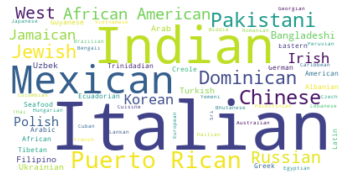

<Figure size 2160x3240 with 0 Axes>

In [61]:
# display the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()



Most Preferred Food in New York City -
<ul>
    <li>Italian</li>
    <li>Purto Rican</li>
    <li>Mexican</li>
    <li>Jewish</li>
    <li>Indian</li>
    <li>Pakistani</li>
    <li>Dominican</li>
</ul>
<b>BROOKLYN CUISINE - WORD CLOUD</b>

In [62]:
Brooklyn_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Neighborhood,Borough,Cuisine
0,Bay Ridge,Brooklyn,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,Bedford-Stuyvesant,Brooklyn,"African-American, Jamaican, Trinidadian, Puert..."
2,Bensonhurst,Brooklyn,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,Borough Park,Brooklyn,"Jewish, Italian, Mexican, Chinese"
4,Brighton Beach,Brooklyn,"Russian, Georgian, Turkish, Pakistani and Ukra..."


In [63]:
BR_CUISINE_WC = Brooklyn_data[['Cuisine']]
BR_CUISINE_WC

,Cuisine
0,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,"African-American, Jamaican, Trinidadian, Puert..."
2,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,"Jewish, Italian, Mexican, Chinese"
4,"Russian, Georgian, Turkish, Pakistani and Ukra..."
5,"Puerto Rican, Mexican, Dominican, and Ecuadorian"
6,"Jamaican, West Indian, African-American"
7,Italian
8,"Jamaican, West Indian, and Jewish"
9,"African-American, Dominican, and Puerto Rican"


In [64]:
BR_CUISINE_WC.to_csv('BR_CUISINE.txt', sep=',', index=False)

In [65]:
BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()

In [66]:
stopwords = set(STOPWORDS)

In [67]:
# instantiate a word cloud object
BR_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BR_CUISINE_NYC.generate(BR_CUISINE_WC)

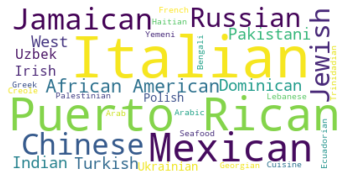

<Figure size 2160x3240 with 0 Axes>

In [68]:
# display the word cloud
plt.imshow(BR_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in Brooklyn is -
<ul>
    <li>Italian</li>
    <li>Purto Rican</li>
    <li>Mexican</li>
</ul>
<b>QUEENS CUISINE - WORD CLOUD</b>

In [69]:
Queens_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Neighborhood,Borough,Cuisine
0,Astoria,Queens,"Greek, Italian, Eastern European, Brazilian, E..."
1,Bellerose,Queens,Indian and Pakistani
2,Flushing,Queens,Chinese and Korean
3,Forest Hills,Queens,"Jewish, Russian and Uzbek"
4,Howard Beach,Queens,Italian


In [70]:
Q_CUISINE_WC = Queens_data[['Cuisine']]
Q_CUISINE_WC

,Cuisine
0,"Greek, Italian, Eastern European, Brazilian, E..."
1,Indian and Pakistani
2,Chinese and Korean
3,"Jewish, Russian and Uzbek"
4,Italian
5,German and Polish
6,"Indian, Pakistani, Bangladeshi, Colombian, Ecu..."
7,"Bangladeshi, Caribbean; African-American; Afri..."
8,"Arab, Chinese, and Italian"
9,"Indian, Guyanese, Trinidadian, Pakistani, Bang..."


In [71]:
Q_CUISINE_WC.to_csv('Q_CUISINE.txt', sep=',', index=False)

In [72]:
Q_CUISINE_WC = open('Q_CUISINE.txt', 'r').read()

In [73]:
stopwords = set(STOPWORDS)

In [74]:
# instantiate a word cloud object
Q_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Q_CUISINE_NYC.generate(Q_CUISINE_WC)

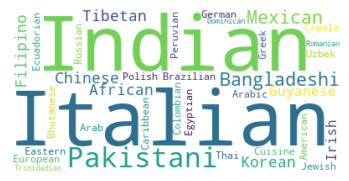

<Figure size 2160x3240 with 0 Axes>

In [75]:


# display the word cloud
plt.imshow(Q_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()





Most Preferred Food in Queens is -
<ul>
    <li>Indian</li>
    <li>Irish</li>
    <li>Pakistani</li>
    <li> Mexican</li>
</ul>
<b>MANHATTAN CUISINE - WORD CLOUD</b>

In [76]:
Manhattan_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan_data.head()

,Neighborhood,Borough,Cuisine
0,Chinatown,Manhattan,Chinese and Vietnamese
1,East Harlem,Manhattan,"Puerto Rican, Mexican, Dominican, Chinese-Cuba..."
2,East Village,Manhattan,"Japanese, Korean, Indian and Ukrainian"
3,Greenwich Village,Manhattan,Italian and Middle Eastern
4,Harlem,Manhattan,"Italian, African-American, Latin American, Wes..."


In [77]:
MN_CUISINE_WC = Manhattan_data[['Cuisine']]
MN_CUISINE_WC

,Cuisine
0,Chinese and Vietnamese
1,"Puerto Rican, Mexican, Dominican, Chinese-Cuba..."
2,"Japanese, Korean, Indian and Ukrainian"
3,Italian and Middle Eastern
4,"Italian, African-American, Latin American, Wes..."
5,Korean
6,Australian
7,Italian
8,"Puerto Rican, Jewish, Italian, and Latin American"
9,"Indian, Pakistani and Bangladeshi"


In [78]:
MN_CUISINE_WC.to_csv('MN_CUISINE.txt', sep=',', index=False)

In [79]:
MN_CUISINE_WC = open('MN_CUISINE.txt', 'r').read()

In [80]:
stopwords = set(STOPWORDS)

In [81]:
# instantiate a word cloud object
MN_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
MN_CUISINE_NYC.generate(MN_CUISINE_WC)



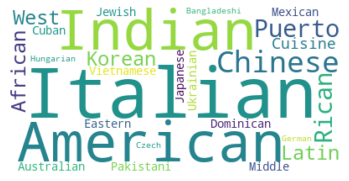

<Figure size 2160x3240 with 0 Axes>

In [82]:
# display the word cloud
plt.imshow(MN_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()



Most Preferred Food in Manhattan is -
<ul>
    <li>Italian</li>
    <li>American</li>
    <li>Puerto Rican</li>
    <li>Indian</li>
</ul>
<b>THE BRONX CUISINE - WORD CLOUD</b>

In [83]:
Bronx_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'The Bronx'].reset_index(drop=True)
Bronx_data.head()

,Neighborhood,Borough,Cuisine


In [84]:
BX_CUISINE_WC = Bronx_data[['Cuisine']]
BX_CUISINE_WC

,Cuisine


In [85]:
BX_CUISINE_WC.to_csv('BX_CUISINE.txt', sep=',', index=False)

In [86]:
BX_CUISINE_WC = open('BX_CUISINE.txt', 'r').read()

In [87]:
stopwords = set(STOPWORDS)

In [88]:
# instantiate a word cloud object
BX_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BX_CUISINE_NYC.generate(BX_CUISINE_WC)

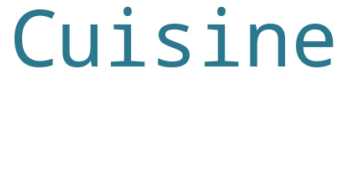

<Figure size 2160x3240 with 0 Axes>

In [89]:
# display the word cloud
plt.imshow(BX_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in The Bronx is -
<ul>
    <li>Italian</li>
    <li>Puerto Rican</li>
    <li>Albanian</li>
    <li>Dominican</li>



## Part 4 Download and Explore Farmers Market dataset



The dataset is downloaded from the website. The link is as given below :

https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2


In [90]:
#!conda install -c anaconda xlrd --yes
FM_NYC=pd.read_csv('DOHMH_Farmers_Markets.csv')

In [91]:
FM_NYC.head()

,Borough,Market Name,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Woodhull Hospital Youthmarket,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"(40.700726, -73.941932)"
1,Manhattan,Mount Sinai Hospital Greenmarket,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
3,Manhattan,Greenmarket at Oculus Plaza,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"(40.711535, -74.010464)"
4,Queens,Ditmars Park Youthmarket,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"(40.772854, -73.906061)"




Website-https://www.grownyc.org/greenmarketco/foodbox
GrowNYC's Fresh <b>Food Box</b> Program is a food access initiative that enables under-served communities to purchase fresh, healthy, and primarily regionally grown produce well below traditional retail prices.

A <b>farmers' market</b> is often defined as a public site used by two or more local or regional producers for the direct sale of farm products to consumers. In addition to fresh fruits and vegetables, markets may sell dairy products, fish, meat, baked goods, and other minimally processed foods.

So, in this we will filter farmers' market data and explore it.


In [92]:
FM_NYC.rename(columns={'Accepts EBT':'Accepts_EBT'}, inplace=True)
print(FM_NYC.Accepts_EBT.unique())

['Yes' 'No']


In [93]:
FM_NYC['Accepts_EBT'].value_counts().to_frame()

,Accepts_EBT
Yes,129
No,9


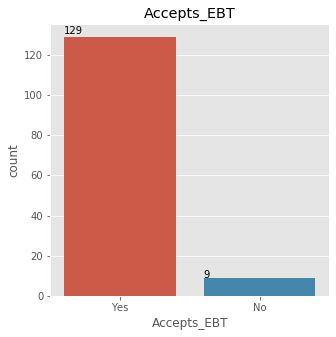

In [94]:
import seaborn as sns
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Accepts_EBT',data=FM_NYC)
ax.set_title("Accepts_EBT")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

In [95]:
# FM_NYC_filtered - Dataset with only Farmers Market
FM_NYC_filtered = FM_NYC[FM_NYC['Accepts_EBT'] == 'Yes'].copy()
FM_NYC_filtered ['Borough'] = FM_NYC_filtered['Borough'].map(lambda x: x.strip())
print(FM_NYC_filtered.shape)
FM_NYC_filtered.head()

(129, 13)


,Borough,Market Name,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts_EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Woodhull Hospital Youthmarket,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"(40.700726, -73.941932)"
1,Manhattan,Mount Sinai Hospital Greenmarket,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
3,Manhattan,Greenmarket at Oculus Plaza,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"(40.711535, -74.010464)"
4,Queens,Ditmars Park Youthmarket,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"(40.772854, -73.906061)"


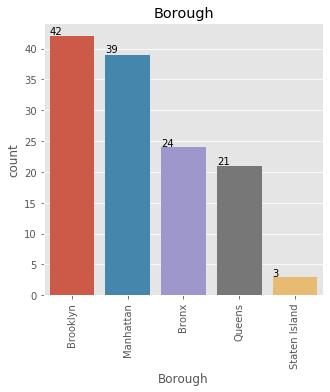

In [96]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=FM_NYC_filtered)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()



Manhattan amd Brooklyn has highest numbers of Farmers Markets

<b>Use geopy library to get the latitude and longitude values of New York City.</b>

The geograpical coordinate of New York City are 40.7308619, -73.9871558.


In [97]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Create a map of New York with Facility name and Borough of Farmers Market superimposed on top

In [99]:
# create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, FacilityName, borough in zip(FM_NYC_filtered['Latitude'], FM_NYC_filtered['Longitude'], FM_NYC_filtered['Market Name'], FM_NYC_filtered['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets